In [1]:
# Import Dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Loading clinical trial data in csv
clinic_data_df = pd.read_csv("Resources/clinicaltrial_data.csv")
clinic_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Loading mouse drug data in csv
mousedrug_data_df = pd.read_csv("Resources/mouse_drug_data.csv")
mousedrug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Merge our two data frames together
combined_data = pd.merge(clinic_data_df, mousedrug_data_df, on=["Mouse ID","Mouse ID"])
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [8]:
drugtumor_group_by = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

drugtumor_group_by_result = pd.DataFrame(drugtumor_group_by)
drugtumor_group_by_result.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [10]:
#Creating a pivot table for to analyse the Tumor Response to Treatment
df_mean = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
drugtumor_df_mean = df_mean.reset_index()
drugtumor_df_mean = drugtumor_df_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


drugtumor_df = drugtumor_group_by.reset_index()
drugtumor_pivot = drugtumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# drugtumor_df = pd.pivot_table(combined_data, index = ["Drug", "Timepoint"], values=["Tumor Volume (mm3)"]).unstack("Drug")
# drugtumor_df.head()
drugtumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


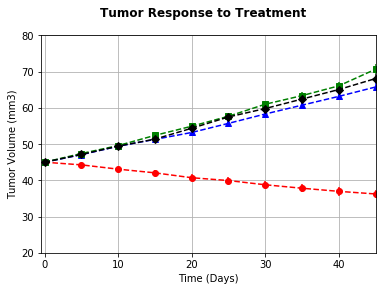

In [18]:

fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment",
             fontsize=12, fontweight="bold")

ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Capomulin"],yerr=drugtumor_pivot["Capomulin"], color='red',fmt="o",linestyle ='dashed')
ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Infubinol"],yerr=drugtumor_pivot["Infubinol"], color='blue',fmt="^",linestyle ='dashed')
ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Ketapril"],yerr=drugtumor_pivot["Ketapril"], color='green',fmt="s",linestyle ='dashed')
ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Placebo"],yerr=drugtumor_pivot["Placebo"], color='black', fmt="D",linestyle ='dashed' )


ax.set_xlim(-0.5, 45)
ax.set_ylim(20, 80)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()



In [19]:
#Creating a pivot table for to analyse the Metastatic Response to Treatment
drugmetast_df = pd.pivot_table(combined_data, index = ["Drug", "Timepoint"], values=["Metastatic Sites"]).unstack("Drug")
drugmetast_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [ ]:
drugmetast_df.plot(kind="scatter", x=drugmetast_df.index.values, y= "Metastatic Sites", label = drugmetast_df['Drug'].value,  grid=True, figsize=(20,10),
              title="Metastatic Response to Treatment")
plt.show()

In [ ]:
#Creating a pivot table for to analyse the survival rate of mice
survival_df = pd.pivot_table(combined_data, index = ["Drug", "Timepoint"], values=["Mouse ID"], aggfunc = 'count').unstack("Drug")
survival_df.head